In [8]:
from qiskit import Aer, transpile
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [2]:
def reflect_zero(nqubits: int):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # We will return the diffuser as a gate
    U_0 = qc.to_gate()
    U_0.name = "U$_0$"
    return U_0

In [3]:
# 101 and 110
def sample_oracle_3_bits():
    qc = QuantumCircuit(3)
    qc.cz(0, 2)
    qc.cz(1, 2)
    oracle_ex3 = qc.to_gate()
    oracle_ex3.name = "U$_\chi$"
    return oracle_ex3

In [4]:
n = 3
qc = QuantumCircuit(n)
# A
for qubit in range(n):
    qc.h(qubit)
# S_\chi
qc.append(sample_oracle_3_bits(), [0,1,2])
# A^-1
for qubit in range(n):
    qc.h(qubit)
# S_0
qc.append(reflect_zero(n), [0,1,2])
# A
for qubit in range(n):
    qc.h(qubit)

In [5]:
qc.measure_all()

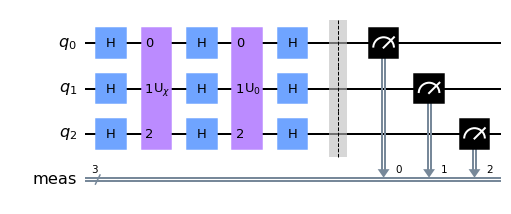

In [6]:
qc.draw('mpl')

In [9]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(qc, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()

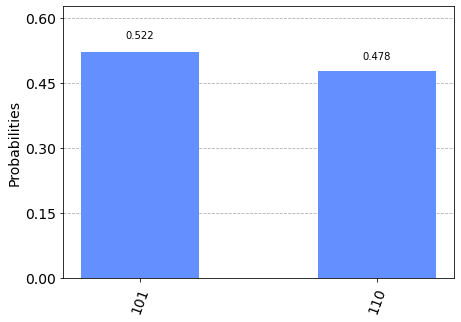

In [10]:
counts = results.get_counts()
plot_histogram(counts)